In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [5]:
data = fetch_california_housing()

In [7]:
X = data.data[:, [0]]
y = data.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
poly_model = make_pipeline(PolynomialFeatures(degree = 15), StandardScaler(), LinearRegression())

In [39]:
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [41]:
y_train_pred = poly_model.predict(X_train)
y_test_pred = poly_model.predict(X_test)

In [43]:
mean_squared_error(y_train, y_train_pred)

0.6755125315793059

In [45]:
mean_squared_error(y_test, y_test_pred)

0.6936344383677671

In [47]:
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

In [49]:
y_range_pred = poly_model.predict(X_range)

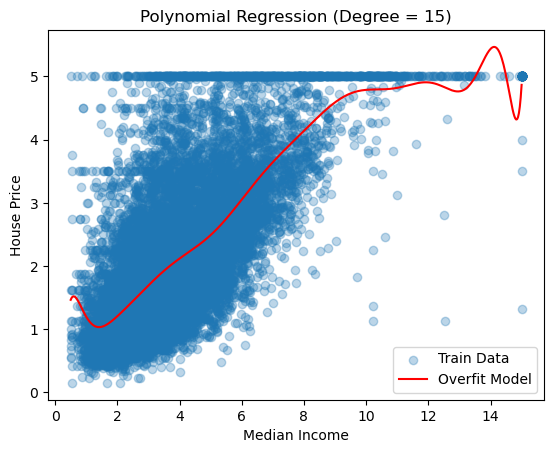

In [51]:
plt.scatter(X_train, y_train, label = "Train Data", alpha = 0.3)
plt.plot(X_range, y_range_pred, color = 'red', label = "Overfit Model")
plt.title("Polynomial Regression (Degree = 15)")
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.legend()
plt.show()

In [35]:
ridge_model = make_pipeline(PolynomialFeatures(degree = 15), StandardScaler(), Ridge(alpha = 1))

In [37]:
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=1))])

In [53]:
y_ridge_test = ridge_model.predict(X_test)

In [55]:
mean_squared_error(y_test, y_ridge_test)

0.6986164205439875

In [57]:
lasso_model = make_pipeline(PolynomialFeatures(degree = 15), StandardScaler(), Lasso(alpha = 0.01, max_iter = 10000))

In [59]:
lasso_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.01, max_iter=10000))])

In [61]:
y_lasso_test = lasso_model.predict(X_test)

In [63]:
mean_squared_error(y_test, y_lasso_test)

0.6987313294886363